# 1. Работа с датасетом. 

### 1.1 Инициализация проекта и предобработка.

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [30]:
data = pd.read_csv('../data/weatherAUS.csv')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [32]:
data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [33]:
for column in data.columns:
    if data[column].dtype == 'int64':
        data[column].fillna(data[column].median(), inplace=True)
    elif data[column].dtype == 'float64':
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

In [34]:
data["Temp9am"].unique()

array([16.9       , 17.2       , 21.        , 18.1       , 17.8       ,
       20.6       , 16.3       , 18.3       , 20.1       , 20.4       ,
       15.9       , 17.4       , 15.8       , 17.3       , 18.        ,
       15.5       , 19.1       , 24.5       , 23.8       , 20.9       ,
       21.5       , 23.2       , 26.6       , 24.6       , 21.6       ,
       12.5       , 19.7       , 14.9       , 17.1       , 20.7       ,
       22.4       , 23.1       , 25.2       , 17.9       , 20.2       ,
       22.8       , 24.2       , 24.3       , 25.6       , 27.6       ,
       16.        , 22.        , 26.8       , 27.3       , 26.1       ,
       23.3       , 21.2       , 23.4       , 25.8       , 28.2       ,
       29.        , 29.2       , 29.9       , 32.4       , 28.8       ,
       27.2       , 25.5       , 26.5       , 28.7       , 29.6       ,
       34.5       , 18.7       , 16.7       , 17.        , 19.2       ,
       21.4       , 22.1       , 19.3       , 15.        , 20.  

In [35]:
for ind, value in enumerate(data["Temp9am"]):
    clean = str(value).replace('.', '')
    data.at[ind, 'Temp9am'] = int(clean)

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

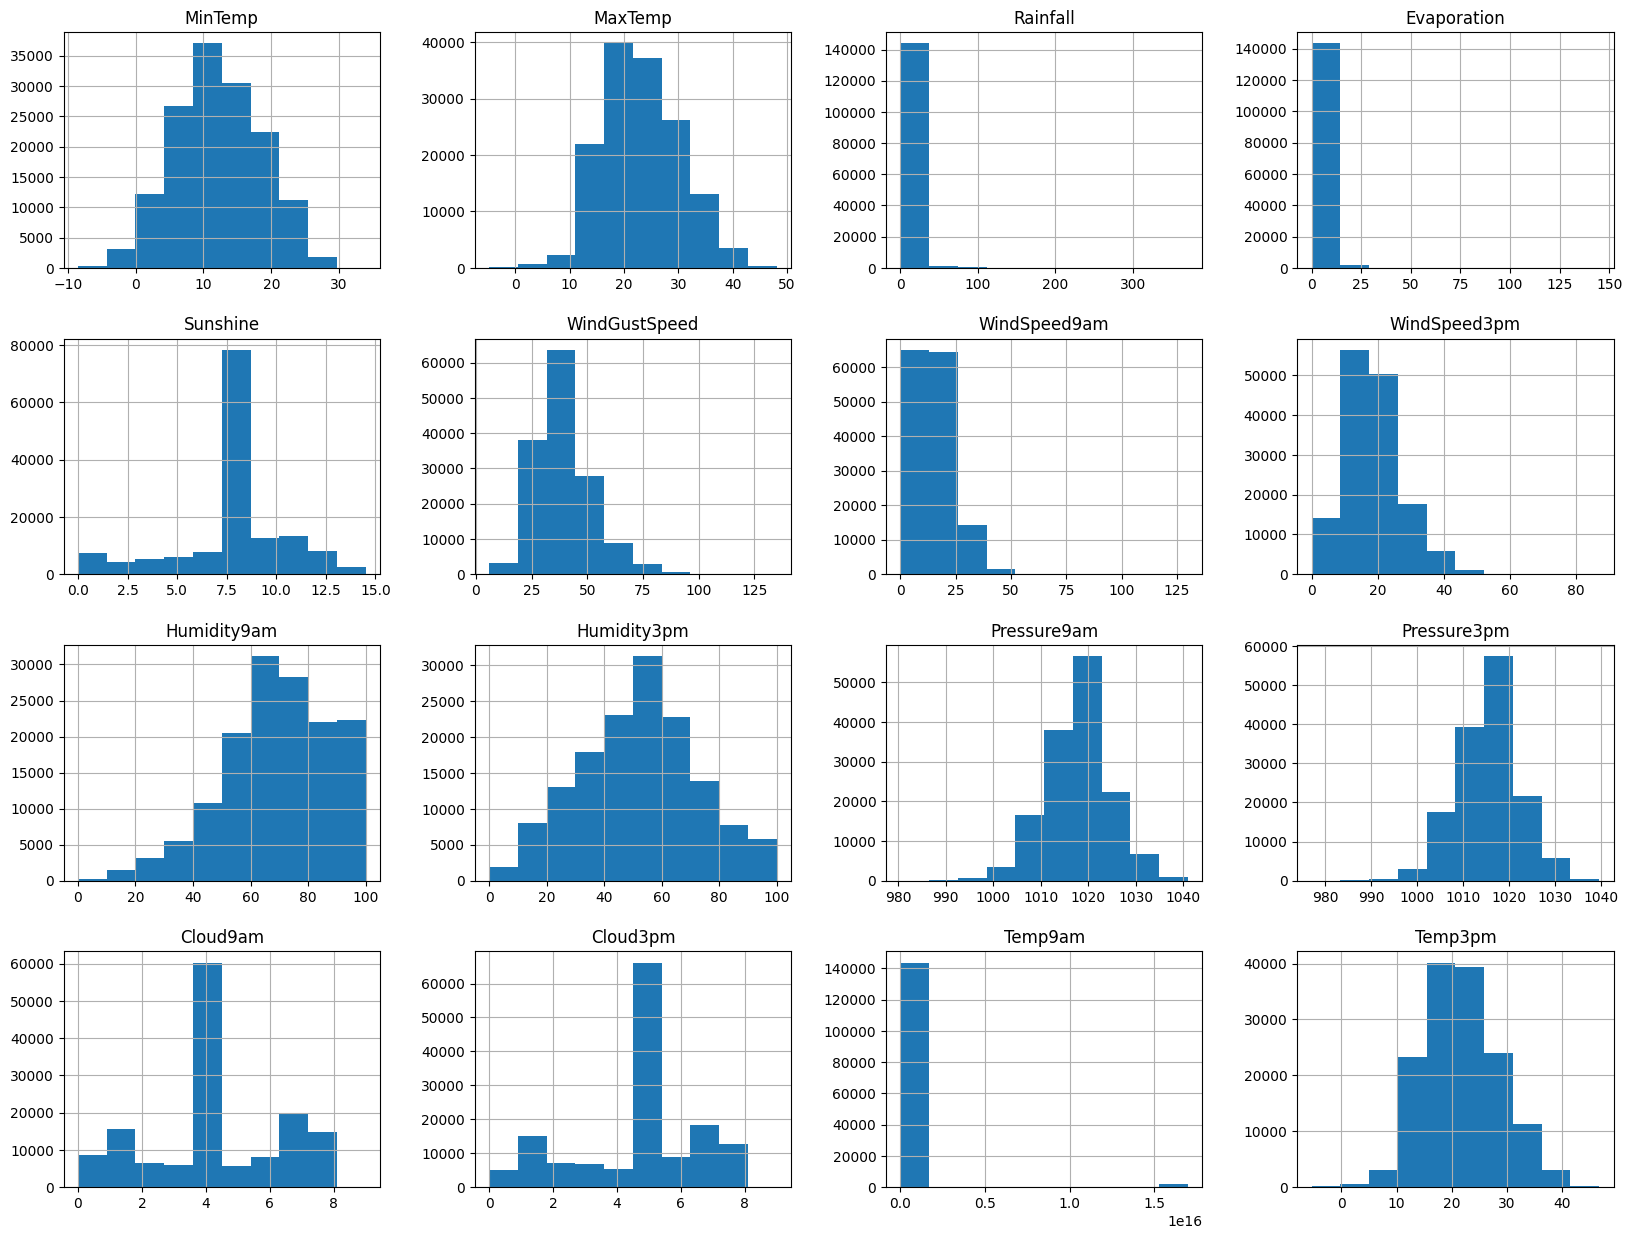

In [36]:
data.hist(figsize=(20,15))

In [37]:
outlier = data[['Temp9am', 'Temp3pm', 'Pressure9am', 'Pressure3pm', 'Humidity9am', 'Cloud9am', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Sunshine', 'Rainfall', 'Evaporation']]
Q1 = outlier.quantile(0.25)
Q3 = outlier.quantile(0.75)
IQR = Q3-Q1

In [38]:
data_filtered = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
index_list = list(data_filtered.index.values)
data = data[data.index.isin(index_list)]
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,5.468232,7.611178,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.50993,169.0,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,5.468232,7.611178,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,4.447461,4.50993,172.0,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,5.468232,7.611178,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,4.447461,2.00000,210.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,5.468232,7.611178,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,4.447461,4.50993,181.0,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,5.468232,7.611178,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.00000,178.0,29.7,No,No


array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'Rainfall'}>,
        <Axes: title={'center': 'Evaporation'}>],
       [<Axes: title={'center': 'Sunshine'}>,
        <Axes: title={'center': 'WindGustSpeed'}>,
        <Axes: title={'center': 'WindSpeed9am'}>,
        <Axes: title={'center': 'WindSpeed3pm'}>],
       [<Axes: title={'center': 'Humidity9am'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>,
        <Axes: title={'center': 'Pressure3pm'}>],
       [<Axes: title={'center': 'Cloud9am'}>,
        <Axes: title={'center': 'Cloud3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>]], dtype=object)

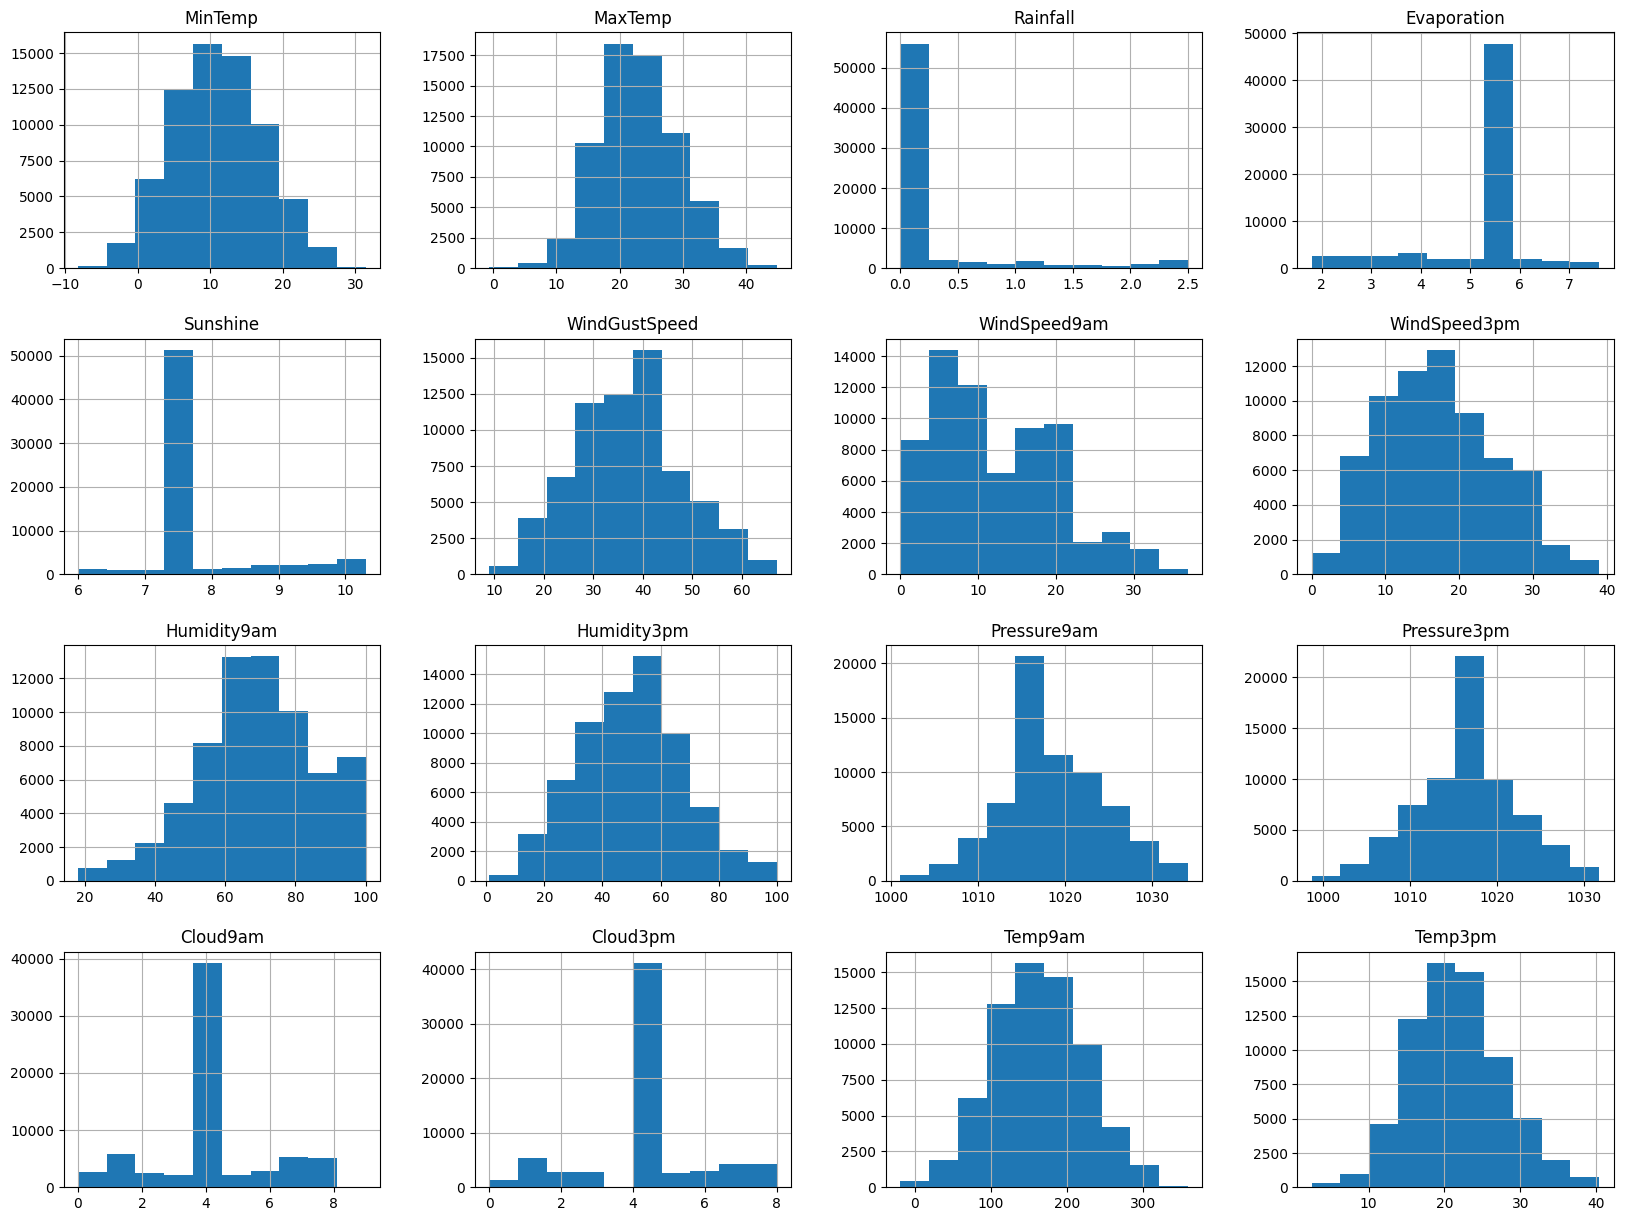

In [39]:
data.hist(figsize=(20,15))

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [41]:
data['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'N', 'NNE', 'ENE', 'SSE', 'S', 'SW',
       'NNW', 'SE', 'NW', 'E', 'SSW', 'ESE'], dtype=object)

In [42]:
data['RainToday'].unique()

array(['No', 'Yes'], dtype=object)

In [43]:
data['Location'] = pd.Categorical(data['Location']).codes
data['WindGustDir'] = pd.Categorical(data['WindGustDir']).codes
data['WindDir9am'] = pd.Categorical(data['WindDir9am']).codes
data['WindDir3pm'] = pd.Categorical(data['WindDir3pm']).codes
data['RainToday'] = pd.Categorical(data['RainToday']).codes
data['RainTomorrow'] = pd.Categorical(data['RainTomorrow']).codes

In [44]:
data = data.drop(['Date'], axis=1)

### 1.2 Разделение на обучающую и тестовую выборки, устранение дисбаланса.

In [45]:
y = data['RainTomorrow']
X = data.drop(['RainTomorrow'],axis = 1)

In [46]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
X[y==0].shape

(57290, 21)

In [48]:
X[y==1].shape

(10195, 21)

In [49]:
from imblearn.under_sampling import RandomUnderSampler

Russia = RandomUnderSampler()
X_res, y_res = Russia.fit_resample(X, y)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=0)

# 2. Обучение моделей.

## 2.1. Регрессия. L1. Lasso.

In [57]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

In [65]:
lasso = Lasso(alpha=0.1).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lasso.score(X_test, y_test)}')
lasso.coef_

MAE: 0.45110831035649174
MSE: 0.21416899916103754
RMSE: 0.46278396597228555
MAPE: 32024972.396439485
R^2: 0.14324961121439062


array([-0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.10467191, -0.        ,
       -0.01985263,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ])

### 2.1.1. Подбор гиперпараметра.

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = {'alpha':[0.00001, 0.000001, 0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000]}

In [68]:
grid_model = GridSearchCV(lasso,
                          param_grid=param_grid,
                         scoring = 'neg_mean_squared_error',
                         cv = 5, verbose = 2)

In [69]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ........................................alpha=1e-05; total time=   0.1s
[CV] END ........................................alpha=1e-05; total time=   0.4s
[CV] END ........................................alpha=1e-05; total time=   0.4s
[CV] END ........................................alpha=1e-05; total time=   0.4s
[CV] END ........................................alpha=1e-05; total time=   0.3s
[CV] END ........................................alpha=1e-06; total time=   0.4s
[CV] END ........................................alpha=1e-06; total time=   0.4s
[CV] END ........................................alpha=1e-06; total time=   0.4s
[CV] END ........................................alpha=1e-06; total time=   0.4s
[CV] END ........................................alpha=1e-06; total time=   0.4s
[CV] END .......................................alpha=0.0001; total time=   0.4s
[CV] END ......................................

GridSearchCV(cv=5, estimator=Lasso(alpha=0.1),
             param_grid={'alpha': [1e-05, 1e-06, 0.0001, 0.001, 0.01, 0.05, 0.1,
                                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                                   2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10,
                                   20, 50, 100, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=2)

In [70]:
grid_model.best_params_

{'alpha': 0.0001}

In [71]:
lasso = Lasso(alpha=0.0001).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lasso.score(X_test, y_test)}')
lasso.coef_

MAE: 0.377749353754675
MSE: 0.18638406599867885
RMSE: 0.43172220929514254
MAPE: 29024479.59021336
R^2: 0.2543989950303637


array([-0.0028296 ,  0.01502079, -0.01355834,  0.03589854, -0.02251561,
       -0.01789489, -0.00314924,  0.10407784, -0.00428141,  0.00971542,
       -0.0174543 , -0.03632408,  0.00927968,  0.1674662 ,  0.16008317,
       -0.23577068,  0.00127599,  0.0476122 ,  0.00583078,  0.        ,
       -0.0051633 ])

## 2.2. k-NN.

In [72]:
from sklearn.metrics import f1_score, cohen_kappa_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=3, metric='minkowski', p=2)

In [75]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
knn_pred = knn.predict(X_test)

In [78]:
from sklearn.metrics import f1_score, classification_report

In [79]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      2058
           1       0.70      0.68      0.69      2020

    accuracy                           0.70      4078
   macro avg       0.70      0.70      0.70      4078
weighted avg       0.70      0.70      0.70      4078



## 2.2.1. Подбор гиперпараметра.

In [82]:
knn_params = {'n_neighbors': range(1, 55)}

In [85]:
knn_grid = GridSearchCV(knn,
                              knn_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [86]:
knn_grid.best_params_

{'n_neighbors': 39}

In [87]:
knn_grid.best_score_

0.7320992500309567

In [88]:
predictions_knn = knn_grid.predict(X_test)
print(classification_report(y_test, predictions_knn))

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      2058
           1       0.73      0.68      0.71      2020

    accuracy                           0.72      4078
   macro avg       0.72      0.72      0.72      4078
weighted avg       0.72      0.72      0.72      4078

